Now, it's time to know how to analyze data related to health. As Titanic case, we will use logistic regression for this, because we have two possibilities on the output: have or do not have diabetes.
But... first things first.

# Preparing the data for logistic regression
First, let's check our data!

In [2]:
DiabetesData <- read.csv2("diabetes_data.csv", header = TRUE, sep=',')
attach(DiabetesData)
DiabetesData

X,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,...,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,insurance,fh,smoking,dm
<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1000,203,82,56,3.599999905,4.309999943,Buckingham,46,female,...,59,NA,NA,29,38,720,1,0,3,no
2,1001,165,97,24,6.900000095,4.440000057,Buckingham,29,female,...,68,NA,NA,46,48,360,0,0,2,no
3,1002,228,92,37,6.199999809,4.639999866,Buckingham,58,female,...,92,185,92,49,57,180,2,0,2,no
4,1003,78,93,12,6.5,4.630000114,Buckingham,67,male,...,50,NA,NA,33,38,480,1,0,3,no
5,1005,249,90,28,8.899999619,7.71999979,Buckingham,64,male,...,80,NA,NA,44,41,300,0,0,3,yes
6,1008,248,94,69,3.599999905,4.809999943,Buckingham,34,male,...,86,NA,NA,36,42,195,1,0,1,no
7,1011,195,92,41,4.800000191,4.840000153,Buckingham,30,male,...,112,161,112,46,49,720,2,1,2,no
8,1015,227,75,44,5.199999809,3.940000057,Buckingham,37,male,...,NA,NA,NA,34,39,1020,0,0,2,no
9,1016,177,87,49,3.599999905,4.840000153,Buckingham,45,male,...,80,128,86,34,40,300,2,1,1,no


In [25]:
# to check more information about a specific variable, just do a table on it
# to know the sum, include a addmargins
gen <- table(gender)
loc <-table(location)
addmargins(gen)
addmargins(loc)

gender
female   male    Sum 
   234    169    403 

location
Buckingham     Louisa        Sum 
       200        203        403 

In [27]:
# We can also know the proportion
round(prop.table(gen),digits=3)
round(prop.table(loc),digits=3)

gender
female   male 
 0.581  0.419 

location
Buckingham     Louisa 
     0.496      0.504 

In [31]:
# However, table ignore N/A values
table(dm)

dm
 no yes 
330  60 

In [32]:
# If you want to see it, just do:
dm2 <- factor(dm, exclude=NULL)
table(dm2)

dm2
  no  yes <NA> 
 330   60   13 

In [35]:
# For continuous variables, though, use “summary”:
summary(chol)
summary(height)
summary(weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   78.0   179.0   204.0   207.8   230.0   443.0       1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  52.00   63.00   66.00   66.02   69.00   76.00       5 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   99.0   151.0   172.5   177.6   200.0   325.0       1 

In [37]:
# Calculate body mass index (BMI) from height and weight
# We have values of weight and height in pounds and inches, so we need to convert to kg and m
height.si <- height*0.0254
weight.si <- weight*0.453592
bmi <- weight.si/height.si^2
summary(bmi)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  15.20   24.13   27.80   28.79   32.24   55.79       6 

In [64]:
# How to make a categorical variable from a continuous one

bmi_categorised <- ifelse(bmi < 18.5, "underweight", 
                          ifelse(bmi >= 18.5 & bmi <= 25, "normal", 
                                 ifelse(bmi > 25 & bmi <= 30, "overweight", 
                                        ifelse(bmi > 30, "obese", NA)))) 
 
# check that the bmi_categorised variable has worked  
dm_by_bmi_category <- table(bmi_categorised, dm2, exclude = NULL)
dm_by_bmi_category
round(100 * prop.table(dm_by_bmi_category), digits = 1) 

               dm2
bmi_categorised  no yes <NA>
    normal      100   9    4
    obese       118  29    5
    overweight   99  20    4
    underweight   9   0    0
    <NA>          4   2    0

               dm2
bmi_categorised   no  yes <NA>
    normal      24.8  2.2  1.0
    obese       29.3  7.2  1.2
    overweight  24.6  5.0  1.0
    underweight  2.2  0.0  0.0
    <NA>         1.0  0.5  0.0

In [65]:
# Divide in four age groups: under 45, 45-64, 65-74 and 75 or over.
age_categorised <- ifelse(age < 45, "under 45", 
                          ifelse(age >= 45 & age <= 64, "45-64", 
                                 ifelse(age > 64 & age <= 74, "65-74", 
                                        ifelse(age > 74, "over 75", NA))))
table(age_grouped, exclude = NULL) 

# Then tabulate age group by itself, followed by a cross-tabulation with gender.
gender_by_age_category <- table(age_categorised, gender, exclude = NULL)
gender_by_age_category

# add the overall percentages to this cross-tab.
round(100 * prop.table(gender_by_age_category), digits = 1)

# display the cross tabulation as proportion of sample separated by gender, converting to percentage and rounding to 1 decimal place
round(100 * prop.table(age_group_by_gender, margin = 2), digits = 1)

age_grouped
   45 - 64    65 - 74 75 or over   under 45 
       139         41         23        200 

               gender
age_categorised female male
       45-64        75   64
       65-74        21   20
       over 75      12   11
       under 45    126   74

               gender
age_categorised female male
       45-64      18.6 15.9
       65-74       5.2  5.0
       over 75     3.0  2.7
       under 45   31.3 18.4

            gender
age_grouped  female male
  45 - 64      32.1 37.9
  65 - 74       9.0 11.8
  75 or over    5.1  6.5
  under 45     53.8 43.8

# Simple logistic regression: running our model

In [67]:
m <- glm(dm ~ 1, family=binomial (link=logit)) # The “1” is just R’s way of saying that there’s only an intercept term in the model.
summary(m)


Call:
glm(formula = dm ~ 1, family = binomial(link = logit))

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-0.578  -0.578  -0.578  -0.578   1.935  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.7047     0.1403  -12.15   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.87  on 389  degrees of freedom
Residual deviance: 334.87  on 389  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 336.87

Number of Fisher Scoring iterations: 3


In [69]:
# By the way, it’s worth checking how R has interpreted the binary outcome “dm”.
# If you run this below, you see that there are 60 1s and 330 0s,
# which is good because there were 60 yesses and 330 noes in the “dm” vector.
# It’s important to know that R is modelling the log odds of dm=1 and not the log odds of dm=0!
table(m$y)


  0   1 
330  60 

In [70]:
# Checking the data according to gender
m <- glm(dm ~ gender, family=binomial (link=logit))
summary(m)


Call:
glm(formula = dm ~ gender, family = binomial(link = logit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5915  -0.5915  -0.5683  -0.5683   1.9509  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.74150    0.18592  -9.367   <2e-16 ***
gendermale   0.08694    0.28352   0.307    0.759    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.87  on 389  degrees of freedom
Residual deviance: 334.78  on 388  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 338.78

Number of Fisher Scoring iterations: 4


In [71]:
# ... and by age
m <- glm(dm ~ age, family=binomial (link=logit))
summary(m)


Call:
glm(formula = dm ~ age, family = binomial(link = logit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3612  -0.5963  -0.4199  -0.3056   2.4848  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.404530   0.542828  -8.114 4.90e-16 ***
age          0.052465   0.009388   5.589 2.29e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.87  on 389  degrees of freedom
Residual deviance: 299.41  on 388  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 303.41

Number of Fisher Scoring iterations: 5


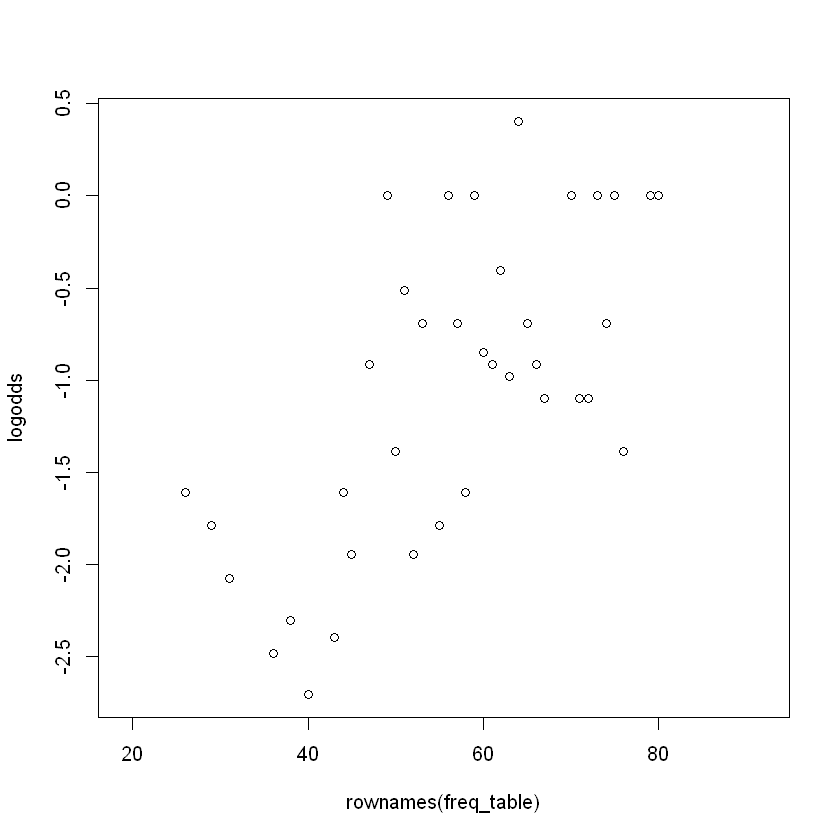

In [6]:
# R assumes that the relation between age and the log odds of having diabetes is linear
# To check if this is reasonable, the easiest way is just to plot one against the other.

# create a cross tabulation of age and diabetes status  
dm_by_age <- table(age, dm) 
 
# output the frequencies of diabetes status by age 
freq_table <- prop.table(dm_by_age, margin = 1) 
 
# calculate the odds of having diabetes 
odds <- freq_table[, "yes"]/freq_table[, "no"] 
 
# calculate the log odds 
logodds <- log(odds) 
 
# plot the ages found in the sample against the log odds of having diabetes 
plot(rownames(freq_table), logodds)

# As we see, it seems to be linear

In [76]:
logodds

19         20         21         22         23         24         25 
      -Inf       -Inf       -Inf       -Inf       -Inf       -Inf       -Inf 
        26         27         28         29         30         31         32 
-1.6094379       -Inf       -Inf -1.7917595       -Inf -2.0794415       -Inf 
        33         34         35         36         37         38         39 
      -Inf       -Inf       -Inf -2.4849066       -Inf -2.3025851       -Inf 
        40         41         42         43         44         45         46 
-2.7080502       -Inf       -Inf -2.3978953 -1.6094379 -1.9459101       -Inf 
        47         48         49         50         51         52         53 
-0.9162907       -Inf  0.0000000 -1.3862944 -0.5108256 -1.9459101 -0.6931472 
        54         55         56         57         58         59         60 
      -Inf -1.7917595  0.0000000 -0.6931472 -1.6094379  0.0000000 -0.8472979 
        61         62         63         64         65         66         67 
-0.9162907 -0.4054651 -0.9808293  0.4054651 -0.6931472 -0.9162907 -1.0986123 
        68         69         70         71         72         73         74 
      -Inf       -Inf  0.0000000 -1.0986123 -1.0986123  0.0000000 -0.6931472 
        75         76         78         79         80         81         82 
 0.0000000 -1.3862944       -Inf  0.0000000  0.0000000       -Inf       -Inf 
        83         84         89         91         92 
      -Inf        Inf       -Inf        Inf       -Inf

In [7]:
# Let's continue the analysis with age and diabetes
model <- glm(dm ~ age, family=binomial (link=logit)) 
summary(model) 


Call:
glm(formula = dm ~ age, family = binomial(link = logit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3612  -0.5963  -0.4199  -0.3056   2.4848  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.404530   0.542828  -8.114 4.90e-16 ***
age          0.052465   0.009388   5.589 2.29e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.87  on 389  degrees of freedom
Residual deviance: 299.41  on 388  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 303.41

Number of Fisher Scoring iterations: 5


Some important things to notice:
* 13 observations deleted due to missingness: For 13 of our patients, we don’t know whether they had diabetes, so they’ve been excluded.
* We can interpretate the coefficients as: Log odds of having diabetes = intercept + (coefficient for age) * age in years = -4.4045 + 0.0525 * age in years
    * If age in years is zero, then we only have the intercept left.
    * At birth, the model is saying that the log odds of having diabetes is -4.4045, which is exp(-4.4084) = 0.012
    * We can convert this to give us 0.012/1.012 = 0.012 (to three decimal places) or 1.2%, which is pretty much the same as the odds.
* The p value for age (Pr(>|z|)) has three asterisks, meaning close to zero, so it’s not compatible with a chance result. Age is a statistically significant predictor.

In [9]:
# Let's check it for gender
model2 <- glm(dm ~ gender, family=binomial (link=logit)) 
summary(model2) 


Call:
glm(formula = dm ~ gender, family = binomial(link = logit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5915  -0.5915  -0.5683  -0.5683   1.9509  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.74150    0.18592  -9.367   <2e-16 ***
gendermale   0.08694    0.28352   0.307    0.759    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.87  on 389  degrees of freedom
Residual deviance: 334.78  on 388  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 338.78

Number of Fisher Scoring iterations: 4


* Here, the log odds for having diabetes for males is 0.0869 higher than that for females.
* This is also the log odds ratio for males compared with females.
* Again, if we exponentiate 0.0869, we get the odds ratio for males compared with females, which is 1.09 (to two decimal places). That implies higher odds for males
* But we also need to inspect the p value, which is 0.759. That’s pretty high and well above the conventional threshold of 0.05, so chance is a likely explanation for the result and we can conclude that we don’t have any good evidence of a gender difference in diabetes odds in this sample.

In [12]:
# While in this data set, gender is nicely labelled, it’s a good idea in general to check how R has entered gender into the model. Do this by typing:
contrasts(gender)
# This confirms that the coefficient given in the output refers to males because males have a 1 next to them in the above output and females have a zero. The log odds for females are incorporated into the intercept.

,male
female,0
male,1


In [14]:
#  To redefine the reference group
gender <- relevel(gender, ref = "male") 
contrasts(gender) 

,female
male,0
female,1


In [18]:
# to access the coefficients, just do a:
model2$coefficients
# and to have it exponential
exp(model$coefficients)

(Intercept)  gendermale 
-1.74149763  0.08693929

(Intercept)         age 
 0.01222184  1.05386580